In [1]:
######

import scanpy as sc
import numpy as np
import pandas as pd
import scvelo as scv

pd.set_option('display.max_rows', 6000)

In [23]:
#### load MHB data ####
#MHB = sc.read('/home/kgr851/python/mistr_atlas/figures/mhb_story/mhb_cells_dorsal_final.h5ad')
MHB = sc.read('/home/kgr851/python/mistr_atlas/figures/mhb_story/mhb_scenic_results2.h5ad')

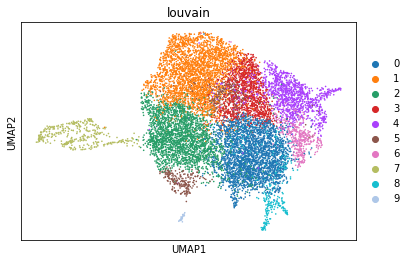

In [3]:
sc.pl.umap(MHB, color = "louvain")

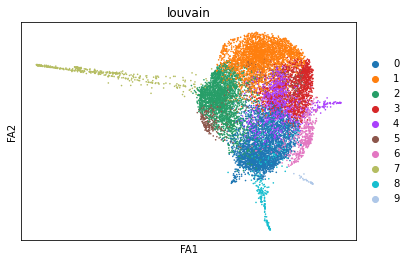

In [4]:
sc.tl.draw_graph(MHB)
sc.pl.draw_graph(MHB, color = 'louvain')

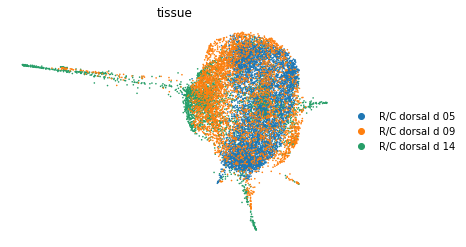

In [5]:
sc.pl.draw_graph(MHB, color = 'tissue',frameon=False)

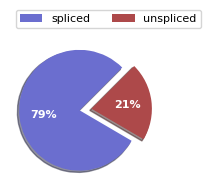

In [6]:
scv.pl.proportions(MHB)

In [7]:
adata = MHB.copy()

In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=1500)
scv.pp.moments(adata,n_neighbors=10,n_pcs=5)


Filtered out 1455 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 1500 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [9]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/128 cores)


  0%|          | 0/296 [00:00<?, ?gene/s]

    finished (0:02:27) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [10]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/128 cores)


  0%|          | 0/11741 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:02) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


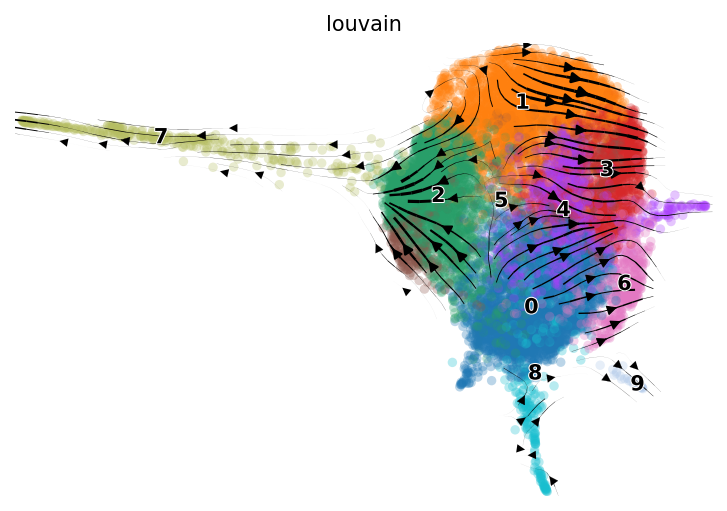

In [11]:
scv.pl.velocity_embedding_stream(adata, basis='draw_graph_fa', dpi = 150)

saving figure to file ./figures/scvelo_mhb_rna_velocity.svg


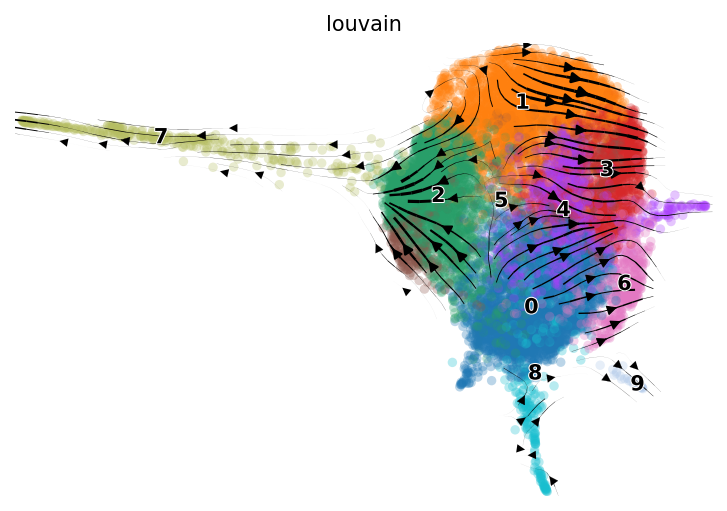

In [12]:
scv.pl.velocity_embedding_stream(adata, basis='draw_graph_fa', dpi = 150, save = 'mhb_rna_velocity.svg')

In [18]:
#### add the cluster names #####
adata.obs['cluster_names'] = adata.obs['louvain'].astype('category')

cluster_names_mhb = ["Presumptive MB",
"Presumptive MHB",
"c MHB",
"Thalamic",
"r MHB",
"HB prog.",
"diencephalic prog.",
"HB neurons",
"dienc. neurons",
"Neural Crest"]



adata.rename_categories('cluster_names', cluster_names_mhb)

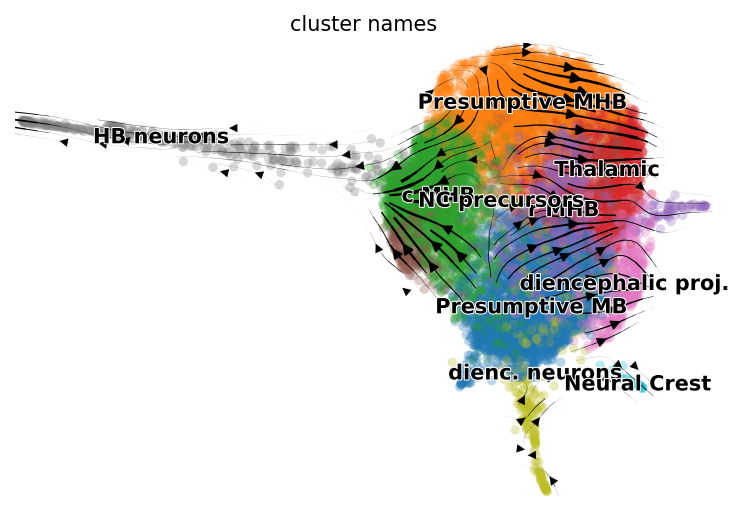

In [20]:
scv.pl.velocity_embedding_stream(adata,color = 'cluster_names', basis='draw_graph_fa', dpi = 150)

In [21]:
##### save the adata for future reference####
adata.write('mhb_velocity_2.h5ad')